# 바이올린 플롯
- 히스토그램과 박스플롯을 하나의 플롯에 나타냄
- 바이올린 플롯에는 사분위범위, 중앙값, 수염과 함께 모든 값 범위의 **관측 빈도**가 표현됨
    - 변숫값의 상대빈도가 바이올린 플롯의 폭으로 표현됨

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace = True)
covidtotals = pd.read_csv('data/covidtotals_ch5.csv', parse_dates = ['lastdate'])
covidtotals.set_index('iso_code', inplace= True)

### SAT 언어능력 점수의 바이올린 플롯
- 정규분포에서 크게 벗어나지 않음을 확인

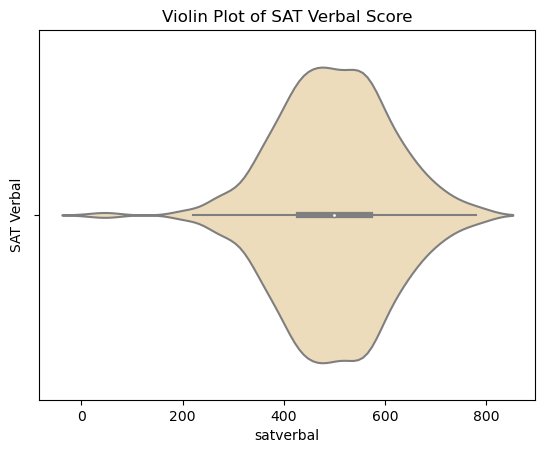

In [9]:
sns.violinplot(nls97.satverbal, color = 'wheat', orient='v')
plt.title('Violin Plot of SAT Verbal Score')
plt.ylabel('SAT Verbal')
# plt.text(0.08, 780, 'outlier threshold', horizontalalignment='center', size = 'x-small')
# plt.text(0.065, nls97.satverbal.quantile(0.75), '3rd quartile')
plt.show()

### 근무 주 수

In [10]:
nls97.loc[:, ['weeksworked16', 'weeksworked17']].describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


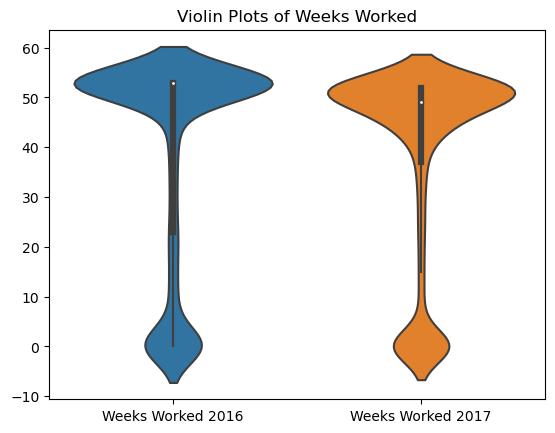

In [11]:
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked16', 'weeksworked17']])
myplt.set_title('Violin Plots of Weeks Worked')
myplt.set_xticklabels(['Weeks Worked 2016', 'Weeks Worked 2017'])
plt.show()

### 성별과 결혼 여부

In [12]:
nls97['maritalstatuscollapsed'] = nls97.maritalstatus.replace(['Married', 'Never-married', 'Divorced', 'Separated', 'Widowed'],\
                                                             ['Married', 'Never-married', 'Not Married', 'Not Married', 'Not Married'])

- 범례를 적당한 곳에 배치하는 시행착오

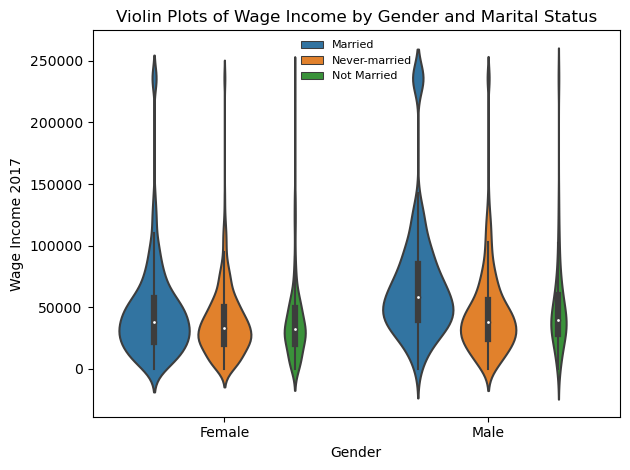

In [16]:
sns.violinplot(nls97.gender, nls97.wageincome, hue=nls97.maritalstatuscollapsed, scale='count')
plt.title('Violin Plots of Wage Income by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title="", loc="upper center", framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

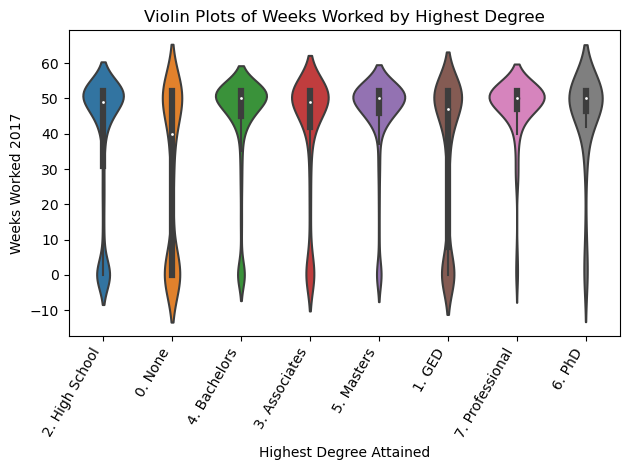

In [17]:
myplt = sns.violinplot('highestdegree', 'weeksworked17', data = nls97, rotation=40)
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
myplt.set_title('Violin Plots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
plt.tight_layout()
plt.show()